In [1]:
import math
import numpy as np
import NSLib2 as l
from scipy.stats import chi2
from scipy.stats import f, t
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# QUESTION 1

# Initialize an empty list to store rows of the matrix
Ar = []

# Open the text file for reading
with open('a1.txt', 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Split the line by comma and convert each element to float
        a = [float(num) for num in line.strip().split(',')]
        # Append the row to the list of rows
        Ar.append(a)

# Convert the list of rows into a numpy array to represent the matrix
A = np.array(Ar)

# Print the matrix
print("Matrix:")
print(A)
print()
Ev_pow = round(l.power_method(A)[0], 3)
qr = l.eigen_value(A)[0]
print("The largest eigenvalue using Power iteration method:", Ev_pow )
print()
print("The eigen values using QR factorization (by Gram Schmidt orthogonalization):")
print(qr)

Matrix:
[[ 4.      0.6667 -1.3333  1.3333]
 [ 0.6667  4.      0.      0.    ]
 [-1.3333  0.      6.      2.    ]
 [ 1.3333  0.      2.      6.    ]]

The largest eigenvalue using Power iteration method: 3.648

The eigen values using QR factorization (by Gram Schmidt orthogonalization):
[8.         5.99996667 4.         2.00003333]


x values: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
y values: [0.486 0.866 0.944 1.144 1.103 1.202 1.166 1.191 1.124 1.095 1.122 1.102
 1.099 1.017 1.111 1.117 1.152 1.265 1.38  1.575 1.857]
The Condition number using Monomial basis: 12104.948671034439
The Condition number using Chebyshev polynomials basis: 3.8561465786155793


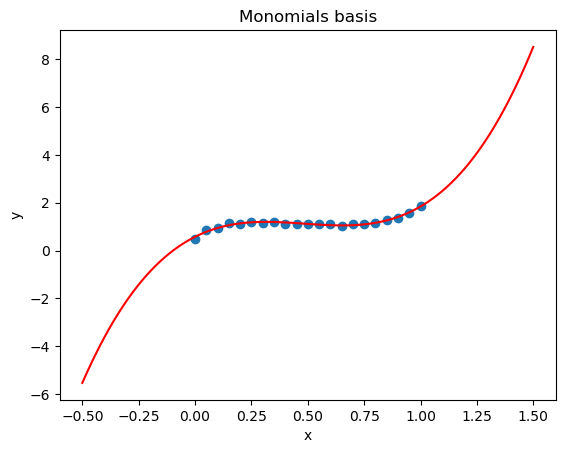

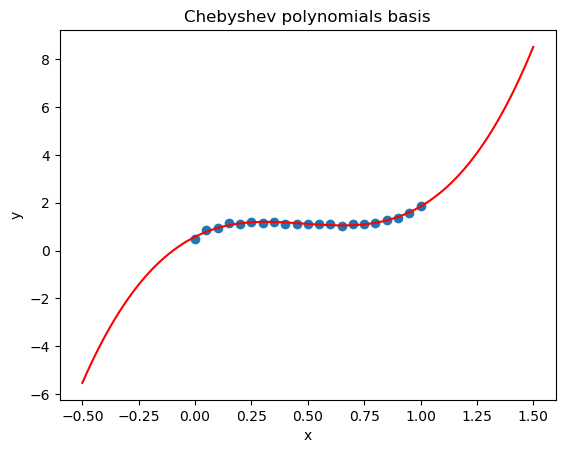

In [3]:
# QUESTION 2

# Initialize empty lists to store x and y values
x_l = []
y_l = []

# Open the text file for reading
with open('assign3fit.txt', 'r') as file:
    # Skip the first line (header)
    next(file)
    # Iterate over each line in the file
    for line in file:
        # Split the line into x and y values
        x, y = line.strip().split('\t')
        # Convert x and y values to float and append to respective lists
        x_l.append(float(x))
        y_l.append(float(y))

x_val = np.array(x_l)
y_val = np.array(y_l)
# Print the extracted x and y values
print("x values:", x_val)
print("y values:", y_val)

def pol_basis(x):
    return np.array([np.ones_like(x), x**1, x**2, x**3])

def chebyshev_basis(x):
    return np.array([np.ones_like(x), 2*x - 1, 8*(x**2)-8*x+1, 32*(x**3)-48*(x**2)+18*x-1])

m1 = l.pol_fit(x_val, y_val, pol_basis)[1]
p1 = l.pol_fit(x_val, y_val, chebyshev_basis)[1]

print("The Condition number using Monomial basis:", m1)
print("The Condition number using Chebyshev polynomials basis:", p1)

pol_par = l.pol_fit(x_val, y_val, pol_basis)[0]
cheb_par = l.pol_fit(x_val, y_val, chebyshev_basis)[0]

x_1 = np.linspace (-0.5, 1.5, 100)
def f1(x):
    y = 0
    for i in range (0, pol_par.shape[0]):
        y += pol_par[i]*x**i
    return y

def f2(x):
    y = cheb_par[0] + cheb_par[1]*(2*x-1) + cheb_par[2]*(8*(x**2)-8*x+1) + cheb_par[3]*(32*(x**3)- 48*(x**2) + 18*x - 1) 
    return y

plt.scatter(x_val, y_val)
plt.plot(x_1, f1(x_1), color='r')
plt.title("Monomials basis")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


plt.scatter(x_val, y_val)
plt.plot(x_1, f2(x_1), color='r')
plt.title("Chebyshev polynomials basis")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



#### As per online tools, The condition number for the matrix is 12104.948671033304 when using monomials as the basis. Conversely, it is 3.856146578615564 when using Chebyshev polynomials. A higher condition number with monomials suggests greater instability to changes in values, whereas using Chebyshev polynomials results in a more stable system. Attached are plots with fitted functions.

In [4]:
#QUESTION 3

# Observed frequencies of grades
observed_freq = np.array([77, 150, 210, 125, 38])

# Total number of observations
total_obs = np.sum(observed_freq)
# total_obs = 600

# Expected frequencies assuming a standard normal distribution
expected_freq = np.array([0.15, 0.24, 0.38, 0.18, 0.05]) * total_obs

# Compute the chi-square test statistic
chi_sq = np.sum((observed_freq - expected_freq)**2 / expected_freq)

# Degrees of freedom
dof = len(observed_freq) - 1

# Critical values for significance levels 5% and 10%
critical_values_5 = chi2.ppf(0.95, dof)
critical_values_10 = chi2.ppf(0.90, dof)

# Print the results
print(f"Chi-square:, {chi_sq:4f}")
print()
print("Degrees of freedom:", dof)
print()
print(f"Critical value at 5% significance level:, {critical_values_5:4f}")
print(f"Critical value at 10% significance level:, {critical_values_10:4f}")
print()
# Perform hypothesis testing
if chi_sq > critical_values_5:
    print("The null hypothesis reejected at 5% significance level. The distribution is not normal.")
else:
    print("At 5% significance level. The distribution may be normal.")


if chi_sq > critical_values_10:
    print("The null hypothesis rejected at 10% significance level. The distribution is not normal.")
else:
    print("At 10% significance level. The distribution may be normal.")


Chi-square:, 8.358090

Degrees of freedom: 4

Critical value at 5% significance level:, 9.487729
Critical value at 10% significance level:, 7.779440

At 5% significance level. The distribution may be normal.
The null hypothesis rejected at 10% significance level. The distribution is not normal.


In [5]:
#QUESTION 4

# Shipment A and B data
S_A = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65,4.80])
S_B = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# F-test
variance_A = np.var(S_A, ddof=1)
variance_B = np.var(S_A, ddof=1)
F = variance_A / variance_B
df1 = len(S_A) - 1
df2 = len(S_B) - 1

alpha = 0.05
critical_value_F = f.ppf(1 - alpha/2, df1, df2)

if F < 1/critical_value_F or F > critical_value_F:
    print("Reject the null hypothesis using F-test. Variances are significantly different.")
else:
    print("Null hypothesis not rejected using F-test. Variances may be equal.")
    
print()
print(f"F-test statistic:, {F:4f}")
print()
print("Degrees of freedom for F-test:", df1, ",", df2)

print(f"Critical value for F-test (alpha=0.05):, {critical_value_F:4f}")
print()


# t-test
mean_A = np.mean(S_A)
mean_B = np.mean(S_B)
std_A = np.std(S_A, ddof=1)
std_B = np.std(S_B, ddof=1)
t_statistic = (mean_A - mean_B) / np.sqrt(std_A**2 / len(S_A) + std_B**2 / len(S_B))
df = (len(S_A) + len(S_B)) - 2
critical_value_t = t.ppf(1 - alpha/2, df)

if t_statistic > critical_value_t or t_statistic < -critical_value_t:
    print("Reject the null hypothesis using t-test. Means are significantly different.")
else:
    print("Null hypothesis not rejected using t-test. Means may be equal.")
print()
print(f"t-test statistic:, {t_statistic:4f}")
print()
print("Degrees of freedom for t-test:", df)
print(f"Critical value for t-test (alpha=0.05):, {critical_value_t:4f}")

Null hypothesis not rejected using F-test. Variances may be equal.

F-test statistic:, 1.000000

Degrees of freedom for F-test: 12 , 6
Critical value for F-test (alpha=0.05):, 5.366244

Null hypothesis not rejected using t-test. Means may be equal.

t-test statistic:, -0.634859

Degrees of freedom for t-test: 18
Critical value for t-test (alpha=0.05):, 2.100922
